#PyTorch Workflow

Lets Explore a exampe Pytorch end-to-end workflow

Resources:

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#torch version
torch.__version__

'2.6.0+cu124'

Data can be almost anything .. in ml

* Excel spread sheet
*images
* videos
*Asio like songs
* DNA
*Text
To showcase lets create some known data using the linear reg formula

In [ ]:
weight= 0.7
bias=0.3

#Create
start=0
end=1
step=0.02
X =torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X+bias

X[:10], y[:10] , len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
 ###SPlit data into trsainin and test sets(imp consepsts)
train_split=int(0.8 * len(X))
X_train,y_train=X[:train_split], y[:train_split]
X_test,y_test=X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we visualize the data "vis vis vis"


In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_predictions(train_Data=X_train,
                     train_lables=y_train,
                     test_Data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """ plots for training data and testing data and compares predictions"""
  plt.figure(figsize=(10,7))
  #plot train in bule
  plt.scatter(train_Data, train_lables, c="b", s=4, label="Training Data")

  #plot test data
  plt.scatter(test_Data, test_labels, c="g" , s=4, label="Test Data")

  #Are there predictions
  if predictions is not None:
    plt.scatter(test_Data, predictions, c="r", s=4, label="Predictions")

  #show the legend
  plt.legend(prop={"size": 10});

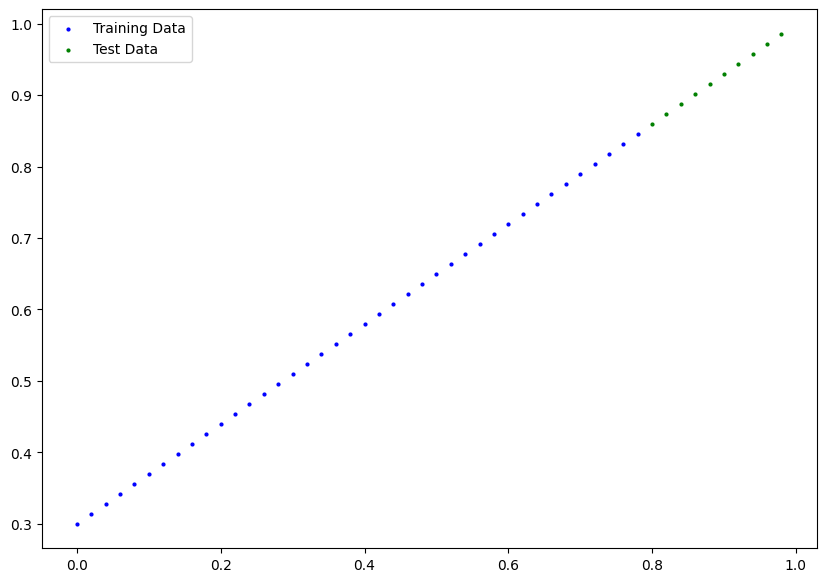

In [ ]:
plot_predictions()

##building pytorch model


In [ ]:
#create a linear reg model class
class LinearRegressionModel(nn.Module): #<- almost every thing in pytorch model
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

    #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias #linear regression model formula



##PyTorch model building essentials

* torch.nn - contains all the buildings for computational graphs
* torch.nn.Parameters - what parameters should oue model try
* torch.nn.Model- base class for all nn modeluls , if you subclass it
* torch.optim- this whre the optimier n pytroch live
* def forward() - All nn.Module subclasses requeire uou to overwrite this function.

In [ ]:
##CHeck contents of pytorch model
#create random seed
torch.manual_seed(42)

model_0=LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
##List names param
model_0.state_dict()



OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

##Making pred using `torch.inference_mode()`
to check out model predictive pwoer , lets see how well it predicts 'y_test' based on "test"

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

with torch.no_grad():
  y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

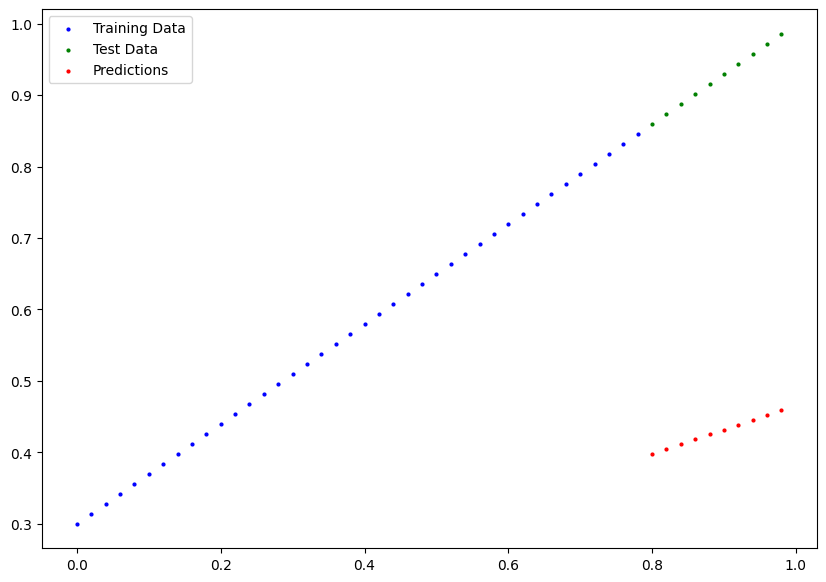

In [ ]:
plot_predictions(predictions=y_preds)

3.Train Model

Loss fun aslo nknow as cost function

In [ ]:
#setup a loss funtion
loss_fn=nn.L1Loss()


#optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
epochs=100

epoch_count, loss_values, test_loss_values= [],[],[]
# loop throght the data
#this is training
for epoch in range(epochs):
  model_0.train()

  #forwat pass
  y_pred=model_0(X_train)
  loss=loss_fn(y_pred, y_train)
  #optmizer xero grad
  optimizer.zero_grad()

  #back propagation
  loss.backward()
  #5 sttep  the optim
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(X_test)
    #cal the loss
    test_loss=loss_fn(test_pred, y_test)
    if epoch % 10==0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      print(model_0.state_dict())




Epoch: 0 | Loss: 0.3013603389263153 | Test Loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Epoch: 10 | Loss: 0.18615034222602844 | Test Loss: 0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Epoch: 20 | Loss: 0.08227583020925522 | Test Loss: 0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bias', tensor([0.3403]))])
Epoch: 30 | Loss: 0.05181945487856865 | Test Loss: 0.14023718237876892
OrderedDict([('weights', tensor([0.4539])), ('bias', tensor([0.3788]))])
Epoch: 40 | Loss: 0.04503796249628067 | Test Loss: 0.11182951927185059
OrderedDict([('weights', tensor([0.4768])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04132963344454765 | Test Loss: 0.09809747338294983
OrderedDict([('weights', tensor([0.4956])), ('bias', tensor([0.3838]))])
Epoch: 60 | Loss: 0.03785243630409241 | Test Loss: 0.08776430785655975
OrderedDict([('weights', tensor([0.5134])), ('bias', tensor([0.3783]))

In [ ]:
import numpy as np

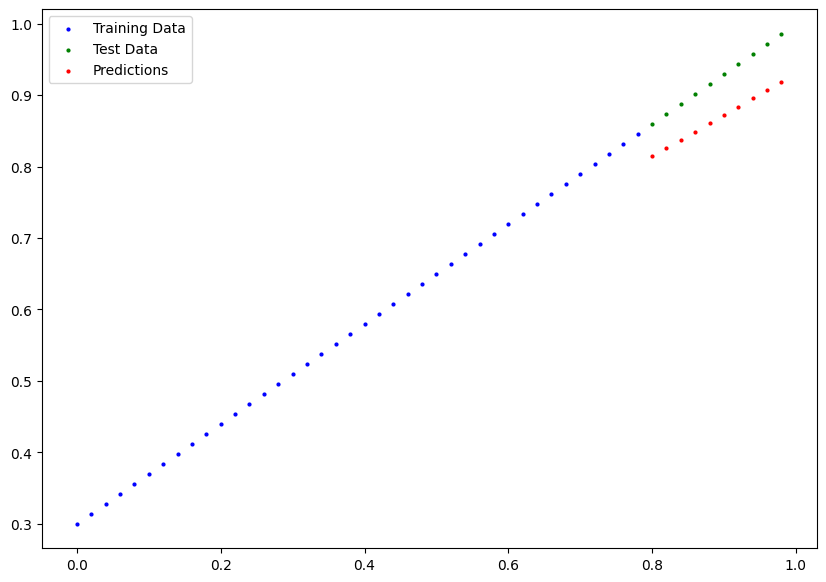

In [ ]:
plot_predictions(predictions=test_pred);

#Plot loss curvers

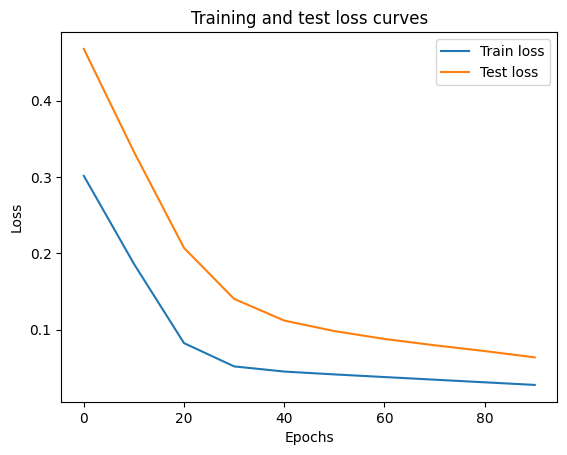

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in Pytorch
#three main methods
1.`torch.save()` save model in pickel format
2. `torch.load()` load rhe save model as pytorch object
3. `torch.nn.Module.load_state_dict()`- save model state dict

ref- https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

In [66]:
from pathlib import Path
#1. Create  amodel directory
Model_Path=Path("models")
Model_Path.mkdir(parents=True, exist_ok=True)

#2. Create model save path
Model_Name="01_pytoch_workflow.pth"
MODEL_SAVE_PATH=Model_Path/ Model_Name

print(f"saving model to : {MODEL_SAVE_PATH}")
#saving model
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

saving model to : models/01_pytoch_workflow.pth


In [63]:
!ls -l models

total 4
-rw-r--r-- 1 root root 2138 Aug 14 20:09 01_pytoch_workflow.pth


In [67]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

Loading a Pytorch Model
since we saved the model in state dict we have we have to create our model instance class


In [70]:
# To load a state dict model we have to create the instance of our model
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [71]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

In [72]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8143],
        [0.8259],
        [0.8375],
        [0.8491],
        [0.8607],
        [0.8723],
        [0.8839],
        [0.8955],
        [0.9071],
        [0.9187]])

In [77]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.8143],
        [0.8259],
        [0.8375],
        [0.8491],
        [0.8607],
        [0.8723],
        [0.8839],
        [0.8955],
        [0.9071],
        [0.9187]])

In [78]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])